In [25]:
# Student Name: Aaron Baggot
# Student Number: C22716399
# Segmentation: Task 3

# Instructions
# 1. Open “Trump.jpg”;
# Use an appropriate colour space and range to segment out areas of
# flesh (you will need to research this);
# 3. Use morphological processes to clean up the ROI.

# Place Trump’s face somewhere entertaining!

# Hue (H)	0	20	Includes red, orange, and some yellow tones — the range where most skin hues fall.
# Saturation (S)	10	255	Avoids very gray or dull colors (too low saturation) and allows full color intensity.
# Value (V)	10	255	Excludes very dark pixels (too low brightness) while including bright ones.

# The image is converted to HSV making it easier to seperate colour information. 
# A range of HSV values were used to represent skin tones. Using this range 
# a binary mask is created where pixels in that range fall into the white category,
# everything else is black. Morphological operations are used with elliptical kernal.
# Finally a cleaned mask used to extract only skin coloured areas from the original image.


In [26]:
import cv2
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt


In [27]:
# Load image
img_path = Path("/Users/aaronbaggot/Desktop/image-processing-labs/data/samples/Trump.jpg")
I = cv2.imread(str(img_path))
I_rgb = cv2.cvtColor(I, cv2.COLOR_BGR2RGB)


In [28]:
# Convert to HSV
hsv = cv2.cvtColor(I, cv2.COLOR_BGR2HSV)

# Define skin colour range - minimum and 
lower_skin = np.array([0, 20, 60], dtype=np.uint8)
upper_skin = np.array([20, 255, 255], dtype=np.uint8)

# Threshold to get skin mask
mask = cv2.inRange(hsv, lower_skin, upper_skin)

# Clean the mask
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7,7))
mask_clean = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel, iterations=2)
mask_clean = cv2.morphologyEx(mask_clean, cv2.MORPH_CLOSE, kernel, iterations=2)

# Extract skin region
skin = cv2.bitwise_and(I_rgb, I_rgb, mask=mask_clean)

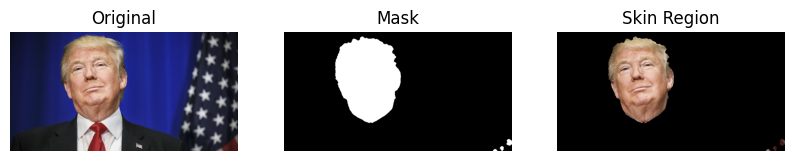

In [29]:
# Display
plt.figure(figsize=(10,4))
plt.subplot(1,3,1); plt.imshow(I_rgb); plt.title("Original"); plt.axis("off")
plt.subplot(1,3,2); plt.imshow(mask_clean, cmap='gray'); plt.title("Mask"); plt.axis("off")
plt.subplot(1,3,3); plt.imshow(skin); plt.title("Skin Region"); plt.axis("off")
plt.show()

In [30]:
import cv2
import numpy as np
from pathlib import Path

# Load Trump face and baby background
trump_path = Path("/Users/aaronbaggot/Desktop/image-processing-labs/data/samples/Trump.jpg")
baby_path = Path("/Users/aaronbaggot/Desktop/image-processing-labs/data/samples/baby.png")

# Convert to HSV
hsv = cv2.cvtColor(I, cv2.COLOR_BGR2HSV)

# Define skin colour range - minimum and maximum
lower_skin = np.array([0, 10, 10], dtype=np.uint8)
upper_skin = np.array([20, 255, 255], dtype=np.uint8)

# Threshold to get skin mask
mask = cv2.inRange(hsv, lower_skin, upper_skin)

# Clean the mask
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7,7))
mask_clean = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel, iterations=2)
mask_clean = cv2.morphologyEx(mask_clean, cv2.MORPH_CLOSE, kernel, iterations=2)

# Extract skin region
skin = cv2.bitwise_and(I_rgb, I_rgb, mask=mask_clean)



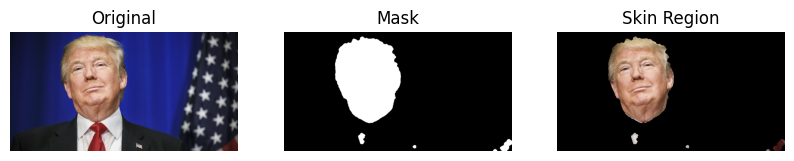

In [31]:
# Display
plt.figure(figsize=(10,4))
plt.subplot(1,3,1); plt.imshow(I_rgb); plt.title("Original"); plt.axis("off")
plt.subplot(1,3,2); plt.imshow(mask_clean, cmap='gray'); plt.title("Mask"); plt.axis("off")
plt.subplot(1,3,3); plt.imshow(skin); plt.title("Skin Region"); plt.axis("off")
plt.show()